## Deep Neural Network for Fashion MNIST Classification
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. It shares the same image size and structure of training and testing splits.
### Data Description:
* Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.
* Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.
* The training and test data sets have 785 columns.
* The first column consists of the class labels (see above), and represents the article of clothing.
* The rest of the columns contain the pixel-values of the associated image.
* Each training and test example is assigned to one of the following labels:
0- T-shirt/top;
1- Trouser;
2- Pullover;
3- Dress;
4- Coat;
5- Sandal;
6- Shirt;
7- Sneaker;
8- Bag;
9- Ankle boot;
*  Since the image data in x_train and x_test is from 0 to 255 , we need to rescale this from 0 to 1.To do this we need to divide the x_train and x_test by 255 . It's important that the training set and the testing set be preprocessed in the same way.

In [1]:
import numpy as np
import pandas as pd
#tensorflow version 2.0
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

#reading data
mnist_train = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
mnist_test = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv')

In [2]:
#standardization
mnist_train.iloc[:,1:] /= 255
mnist_test.iloc[:,1:] /= 255

#splitting features and target column
x_train = mnist_train.iloc[:,1:]
y_train = mnist_train.iloc[:,0]
x_test= mnist_test.iloc[:,1:]
y_test=mnist_test.iloc[:,0]

#further splitting train set into validation and training set
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

Let's have a look at the images in our dataset.

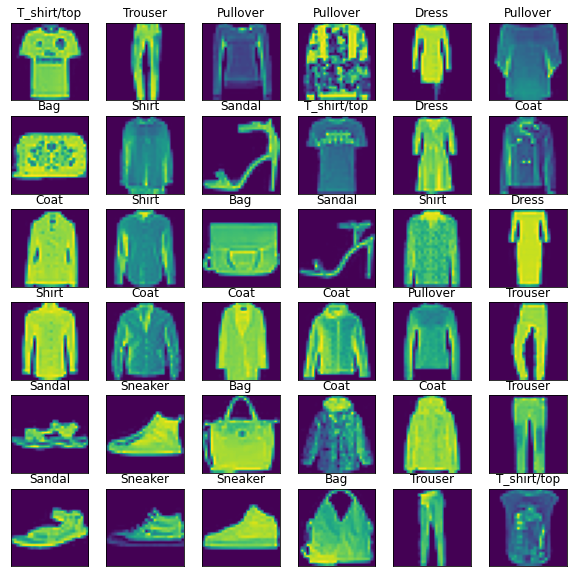

In [3]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.array(x_test.iloc[i]).reshape(28,28))
    label_index = int(y_test[i])
    plt.title(class_names[label_index])
plt.show()

Let's see if our data is balanced.

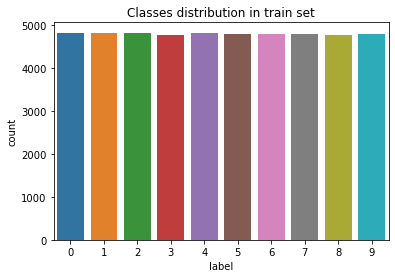

In [4]:
sns.countplot(y_train)
plt.title('Classes distribution in train set');

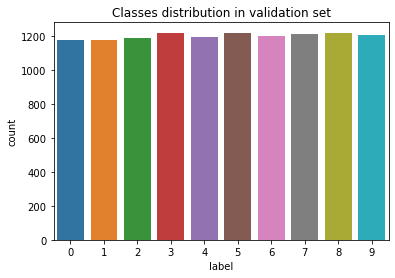

In [5]:
sns.countplot(y_validate)
plt.title('Classes distribution in validation set');

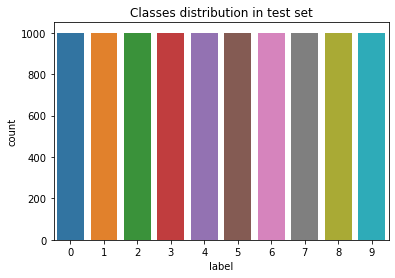

In [6]:
sns.countplot(y_test)
plt.title('Classes distribution in test set');

In [7]:
input_size = 784
output_size = 10
hidden_layer_size = 300
model = tf.keras.Sequential([
    tf.keras.layers.Dense(input_size, activation='relu'),  # input layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 3rd hidden layer
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

model.fit(x_train,y_train, epochs=60, validation_data=(x_validate,y_validate),validation_steps=1, verbose =2,callbacks=early_stop)

Epoch 1/60
1500/1500 - 3s - loss: 0.7080 - accuracy: 0.7455 - val_loss: 0.4688 - val_accuracy: 0.8307
Epoch 2/60
1500/1500 - 3s - loss: 0.4804 - accuracy: 0.8351 - val_loss: 0.3772 - val_accuracy: 0.8625
Epoch 3/60
1500/1500 - 3s - loss: 0.4321 - accuracy: 0.8495 - val_loss: 0.3722 - val_accuracy: 0.8677
Epoch 4/60
1500/1500 - 3s - loss: 0.4011 - accuracy: 0.8612 - val_loss: 0.3489 - val_accuracy: 0.8762
Epoch 5/60
1500/1500 - 4s - loss: 0.3861 - accuracy: 0.8681 - val_loss: 0.3477 - val_accuracy: 0.8810
Epoch 6/60
1500/1500 - 3s - loss: 0.3676 - accuracy: 0.8733 - val_loss: 0.3671 - val_accuracy: 0.8698
Epoch 7/60
1500/1500 - 3s - loss: 0.3619 - accuracy: 0.8751 - val_loss: 0.3552 - val_accuracy: 0.8748
Epoch 8/60
1500/1500 - 3s - loss: 0.3457 - accuracy: 0.8800 - val_loss: 0.3534 - val_accuracy: 0.8668
Epoch 9/60
1500/1500 - 3s - loss: 0.3437 - accuracy: 0.8810 - val_loss: 0.3343 - val_accuracy: 0.8873
Epoch 10/60
1500/1500 - 3s - loss: 0.3325 - accuracy: 0.8850 - val_loss: 0.3394 - 

In [8]:
test_loss, test_accuracy = model.evaluate(x_test,y_test)
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

313/313 [==============================] - 1s 2ms/step - loss: 0.3939 - accuracy: 0.8710
Test loss: 0.39. Test accuracy: 87.10%


In [9]:
pred = model.predict_classes(x_test)
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_test,pred, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.80      0.84      0.82      1000
     Class 1       1.00      0.97      0.99      1000
     Class 2       0.74      0.86      0.80      1000
     Class 3       0.86      0.94      0.90      1000
     Class 4       0.90      0.62      0.74      1000
     Class 5       0.99      0.94      0.96      1000
     Class 6       0.64      0.66      0.65      1000
     Class 7       0.92      0.95      0.93      1000
     Class 8       0.98      0.97      0.97      1000
     Class 9       0.94      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



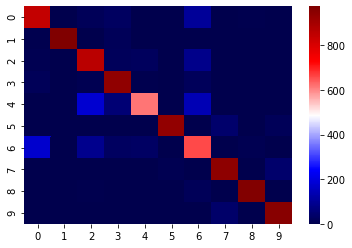

In [10]:
sns.heatmap(confusion_matrix(y_test,pred),cmap='seismic');

Our DNN model is performing worst on samples of class 6 which is shirt and class 2. And it has above 98% accuracy for classes 1(trouser),5(sandal) and 9(ankle boot).

# Convolutional Neural Network

The term deep neural nets refers to any neural network with several hidden layers. Convolutional neural nets are a specific type of deep neural net which are especially useful for image recognition. Specifically, convolutional neural nets use convolutional and pooling layers, which reflect the translation-invariant nature of most images.

For this, we need to reshape our input data.

In [11]:
image_rows = 28
image_cols = 28
image_shape = (image_rows,image_cols,1)
x_train = tf.reshape(x_train,[x_train.shape[0],*image_shape])
x_test = tf.reshape(x_test,[x_test.shape[0],*image_shape])
x_validate = tf.reshape(x_validate,[x_validate.shape[0],*image_shape])

Now we define our model. The first layer in model network (keras.layers.Flatten) transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). This layer unstacks rows of pixels in the image and lining them up and has no parameters to learn; it only reformats the data. Pooling layers are then added to further reduce the number of parameters.

After the pixels are flattened, the network consists of a sequence of two keras.layers.Dense layers. These are densely connected, or fully connected, neural layers.

A problem with training neural networks is in the choice of the number of training epochs to use. Too many epochs can lead to overfitting of the training dataset, whereas too few may result in an underfit model. Early stopping is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset.

In [12]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    tf.keras.layers.MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(), # flatten out the layers
    tf.keras.layers.Dense(196,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

cnn_model.compile(loss ='sparse_categorical_crossentropy',
                  optimizer='adam',metrics =['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=75,
    verbose=1,
    validation_data=(x_validate,y_validate),
    callbacks=early_stop
)

Epoch 1/75
12/12 [==============================] - 1s 63ms/step - loss: 1.7388 - accuracy: 0.3740 - val_loss: 0.9321 - val_accuracy: 0.6456
Epoch 2/75
12/12 [==============================] - 0s 38ms/step - loss: 0.9810 - accuracy: 0.6388 - val_loss: 0.6816 - val_accuracy: 0.7560
Epoch 3/75
12/12 [==============================] - 0s 36ms/step - loss: 0.7399 - accuracy: 0.7330 - val_loss: 0.5562 - val_accuracy: 0.8013
Epoch 4/75
12/12 [==============================] - 0s 37ms/step - loss: 0.6196 - accuracy: 0.7753 - val_loss: 0.4904 - val_accuracy: 0.8228
Epoch 5/75
12/12 [==============================] - 0s 37ms/step - loss: 0.5560 - accuracy: 0.8003 - val_loss: 0.4509 - val_accuracy: 0.8396
Epoch 6/75
12/12 [==============================] - 0s 37ms/step - loss: 0.5024 - accuracy: 0.8220 - val_loss: 0.4225 - val_accuracy: 0.8507
Epoch 7/75
12/12 [==============================] - 0s 37ms/step - loss: 0.4693 - accuracy: 0.8316 - val_loss: 0.3912 - val_accuracy: 0.8617
Epoch 8/75
12

Let us plot the Training Accuracy vs Loss to get a better understanding of the model training.

Text(0.5, 1.0, 'Training - Accuracy')

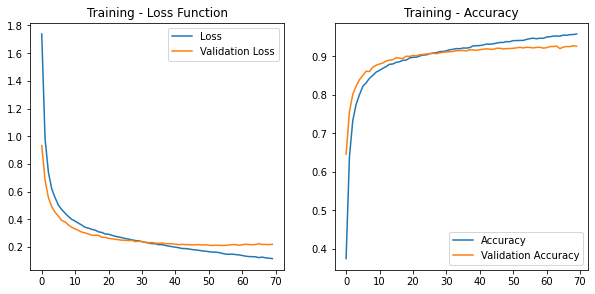

In [13]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training - Accuracy')

In [14]:
cnn_pred = cnn_model.predict_classes(x_test)
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_test,cnn_pred, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.91      0.89      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.88      0.90      0.89      1000
     Class 3       0.94      0.94      0.94      1000
     Class 4       0.90      0.89      0.89      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.81      0.77      0.79      1000
     Class 7       0.96      0.96      0.96      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.96      0.97      0.96      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [15]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2194
Test Accuracy : 0.9280


So, by adding convolution layer and pooling layer model accuracy improved to almost 93%.